I am going to use the following metric functions
1. closeness
2. degree
3. betweenness

In [1]:
import preprocessing as ps
import numpy as np
import networkx as nx
import pickle
import matplotlib.pyplot as plt
import random
random.seed(42)
import csv
import algos as al
import metrics as me

In [2]:
# create the project networks
list_1 = [('DM', 'T'), ('DB', 'T'), ('AI', 'T')]
list_2 = [('DM', 'T'), ('DB', 'T'), ('AI', 'T'), ('DM', 'DB'), ('DM', 'AI'), ('DB', 'AI')]
list_3 = [('DM', 'T'), ('DB', 'T'), ('AI', 'DB')]

star_proj = ps.createProjectNetwork(list_1)
full_proj = ps.createProjectNetwork(list_2)
chain_proj = ps.createProjectNetwork(list_3)

main_network = pickle.load(open(f"./networks/new_subnets/10_nodes.pkl", 'rb'))
project_net = chain_proj
beta = None

In [3]:
import time

obj_max_1 = 0.0
best_set_1 = set()

metric_fn = me.compute_closeness_centrality
network_main = main_network.copy()
print("Influential First")

influential_nodes = al.get_top_node_from_each_group(network_main.copy(), project_net, metric_fn)
start_time = time.time()
for node in influential_nodes:
    subset, comm_eff = al.Greedy(network_main.copy(), project_net, node, metric_fn=metric_fn, beta=beta)
    if comm_eff > obj_max_1:
        obj_max_1 = comm_eff
        best_set_1 = subset

end_time = time.time()
execution_time = end_time - start_time
print("Execution time:", execution_time, "seconds")

total_inf = sum(al.leader_eff(network_main.copy(), project_net, metric_fn, node, beta=beta) for node in best_set_1)
print("Coordinators communication efficiency", total_inf)
# print(f"Objective value : {obj_max_1}")

print("Intra-team ranking")
for node in list(best_set_1):
    print(f"Team :{network_main.copy().nodes[node]['label']}, Node: {node}, Rank: {al.intra_team_rank(network_main, metric_fn, node)}")

print("\n")

print("Inter-team ranking")
for node in list(best_set_1):
    print(f"Team :{network_main.copy().nodes[node]['label']}, Node: {node}, Rank: {al.inter_team_rank(network_main, project_net, metric_fn, node)}")

Influential First
{'Guofei Jiang': 0.1038781163434903, 'Guillaume Wisniewski': 0.0759173344580346, 'Chun Kit Chui': 0.10465116279069768, 'Yuta Tsuboi': 0.1038781163434903, 'Bing Liu': 0.16117478510028654, 'Tianbing Xu': 0.10321100917431192, 'Zhouxuan Teng': 0.07919049714034318, 'Haibin Cheng': 0.08035714285714286, 'ErHeng Zhong': 0.07663487738419619, 'Yabo Xu': 0.06611813106082869}
{'F. Bruce Shepherd': 0.08121277747698971, 'Brendan Lucier': 0.03997512658790087, 'Stefan Dziembowski': 0.04422169811320755, 'Ignaz Rutter': 0.03997512658790087, 'Gordon T. Wilfong': 0.047164867414317156, 'Seth Gilbert': 0.03997512658790087, 'Ravi Montenegro': 0.04138692173273246, 'Siddharth Suri': 0.042690446826676796, 'Qi Cheng': 0.051066727190195185, 'Jianer Chen': 0.046139649338665024}
{'Giovanni Maria Sacco': 0.029168692270296552, 'Jacob Stein': 0.029168692270296552, 'Y. H. Chin': 0.02477086945751796, 'Salvatore T. March': 0.02477086945751796, 'Stephen P. Morgan': 0.027079070886990013, 'Toshimi Minoura'

In [4]:
obj_max_2 = 0.0
best_set_2 = set()

metric_fn = me.compute_closeness_centrality
network_main = main_network.copy()
print("Greedy Algorithm")

start_time = time.time()
for node in network_main.nodes():
    subset, comm_eff = al.Greedy(network_main.copy(), project_net, node, metric_fn=metric_fn, beta=beta)
    if comm_eff > obj_max_2:
        obj_max_2 = comm_eff
        best_set_2 = subset

end_time = time.time()
execution_time = end_time - start_time
print("Execution time:", execution_time, "seconds")

total_inf = sum(al.leader_eff(network_main.copy(), project_net, metric_fn, node, beta=beta) for node in best_set_2)
print("Coordinators communication efficiency", total_inf)
# print(f"Objective value : {obj_max_2}")

print("Intra-team ranking")
for node in list(best_set_2):
    print(f"Team :{network_main.copy().nodes[node]['label']}, Node: {node}, Rank: {al.intra_team_rank(network_main, metric_fn, node)}")

print("\n")

print("Inter-team ranking")
for node in list(best_set_2):
    print(f"Team :{network_main.copy().nodes[node]['label']}, Node: {node}, Rank: {al.inter_team_rank(network_main, project_net, metric_fn, node)}")

Greedy Algorithm
Execution time: 16.019033908843994 seconds
Coordinators communication efficiency 51.77912376727384
Intra-team ranking
Team :DM, Node: Bing Liu, Rank: 1
Team :T, Node: F. Bruce Shepherd, Rank: 1
Team :AI, Node: Robert H. Sloan, Rank: 1
Team :DB, Node: Witold Staniszkis, Rank: 1


Inter-team ranking
Team :DM, Node: Bing Liu, Rank: 1
Team :T, Node: F. Bruce Shepherd, Rank: 3
Team :AI, Node: Robert H. Sloan, Rank: 1
Team :DB, Node: Witold Staniszkis, Rank: 20


In [5]:
# Using Influence Team Strategy
metric_fn = me.compute_closeness_centrality
network_main = main_network.copy()
al.inteam_influence_only(network_main, project_net, metric_fn)

{'Guofei Jiang': 0.1038781163434903, 'Guillaume Wisniewski': 0.0759173344580346, 'Chun Kit Chui': 0.10465116279069768, 'Yuta Tsuboi': 0.1038781163434903, 'Bing Liu': 0.16117478510028654, 'Tianbing Xu': 0.10321100917431192, 'Zhouxuan Teng': 0.07919049714034318, 'Haibin Cheng': 0.08035714285714286, 'ErHeng Zhong': 0.07663487738419619, 'Yabo Xu': 0.06611813106082869}
{'F. Bruce Shepherd': 0.08121277747698971, 'Brendan Lucier': 0.03997512658790087, 'Stefan Dziembowski': 0.04422169811320755, 'Ignaz Rutter': 0.03997512658790087, 'Gordon T. Wilfong': 0.047164867414317156, 'Seth Gilbert': 0.03997512658790087, 'Ravi Montenegro': 0.04138692173273246, 'Siddharth Suri': 0.042690446826676796, 'Qi Cheng': 0.051066727190195185, 'Jianer Chen': 0.046139649338665024}
{'Giovanni Maria Sacco': 0.029168692270296552, 'Jacob Stein': 0.029168692270296552, 'Y. H. Chin': 0.02477086945751796, 'Salvatore T. March': 0.02477086945751796, 'Stephen P. Morgan': 0.027079070886990013, 'Toshimi Minoura': 0.02707907088699

51.77912376727384

In [6]:
# Using Random Strategy
num_iter = 1000
metric_fn = me.compute_closeness_centrality
network_main = main_network.copy()
al.randomMonteCarlo(network_main, project_net, metric_fn, num_iter)

34.7

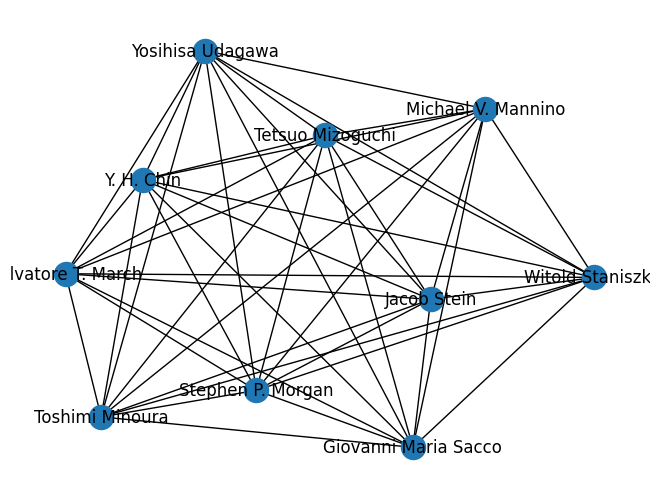

In [7]:
netty = ps.subgraph_by_same_label(network_main, "Stephen P. Morgan")
import networkx as nx
import matplotlib.pyplot as plt

# Plot the netty graph
nx.draw(netty, with_labels=True)
plt.show()